In [146]:
from keras.datasets import mnist
# handwritten digits from 0 to 9
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [147]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape
 # X_train -> we have 60,000 training images, each of size 28x28 pixels
 # y_train -> we have 60,000 trainig labels-- one for each image
 # X_test -> we have 10000 testing images, each of size 28x28 pixels
 # y_test -> we have 10000 test labels, one for each image

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [148]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()
# min 0 , max 255

(np.uint8(0), np.uint8(255), np.uint8(0), np.uint8(255))

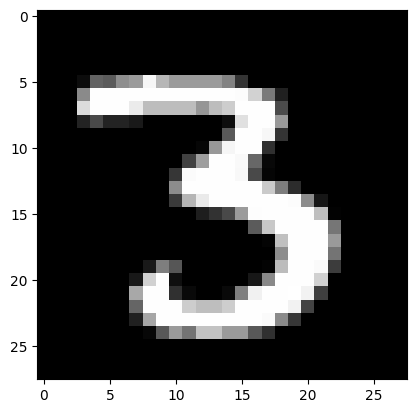

In [149]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12], cmap='gray')
# use different values to get overview of the data
# X_train[0]
# X_train[10]
# X_train[59999]

**# we need to change it from 2D to 1D as the inputs (x1,x2,..,xn-1,xn) are vectors "1D"**

In [150]:
print("Before normalization:")
print(f"X_train original: min={X_train.min()}, max={X_train.max()}")
print(f"X_test original: min={X_test.min()}, max={X_test.max()}")
# Flattening the images
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
# Normalizing the images (MinMax)
# X_train = X_train
# X_test = X_test

Before normalization:
X_train original: min=0, max=255
X_test original: min=0, max=255


In [151]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 784), (60000,), (10000, 784), (10000,))

In [152]:
X_train.min(), X_train.max(),X_test.min(), X_test.max()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [153]:
# X_train[0] is one image image from 60,000 training images
X_train[0] # 784 elements

#That number, 784, is very typical for image data that’s been flattened from a 28 × 28 pixel grayscale image (28 × 28 = 784).
#Each number is the normalized pixel intensity, usually between 0.0 and 1.0.
# 0 is totally black # 1 is totally white

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

***Keras Model***

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [155]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [156]:
# before that it was number 5
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [157]:
# before that it was number 8
y_train[59999]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [158]:
# Build the model.
# Dense layer: each neuron takes input from all the previous neurons
# and its output goes to the all neurons of the next layer.
# in sequential, we define the form of each layer
# We can skip the input layer and just add the number of inputs(features) in the first hidden layer
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)), # first hidden layer
    Dense(64, activation='relu'), # second hidden layer
    Dense(10, activation='softmax') # third hidden layer
    # 64 is the number of neurons
    ])

# Compile the model.
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary.
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

> First Hidden Layer
* No. of inputs:  784
* No. of neurons in hidden layer 1:  64
* Total No. of Parameters:  784*64 (Input-hidden1 weights) + 64 (hidden1 biases)= 50240

> Second Hidden Layer
* No. of inputs:  64
* No. of neurons in hidden layer 2:  64
* Total No. of Parameters:  64*64 (hidden1-hidden2 weights) + 64 (hidden2 biases)= 4160

> Output Layer
* No. of inputs:  64
* No. of neurons in output layer:  10
* Total No. of Parameters:  64*10 (hidden2-output weights) + 10 (output biases)= 650

> Total No. of Parameters:  50240+4160+650= 55050

In [159]:
model.fit(X_train, y_train, epochs=10, batch_size=32)
print("Training Complete")
print("Evaluating Model on the test data..")
model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8565 - loss: 0.4844
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9582 - loss: 0.1363
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9774 - loss: 0.0719
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0553
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0444
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0400
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0346
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0285
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0256
Training Complete
Evaluating Model on the test data..
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - los

[0.11814326047897339, 0.972000002861023]